In [13]:
%load_ext autoreload
%autoreload 2

In [22]:
import imgaug as ia
ia.seed(321)
import imgaug.augmenters as iaa

import os
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import utils_ml4mi as utl
import numpy as np

In [14]:
raw_bleeding_path = "raw_data/bleeding_cases/"
proc_bleeding_path = "proc_data/bleeding_cases/"

for pfolder in os.listdir(raw_bleeding_path):
    for fname in os.listdir(raw_bleeding_path+pfolder):
        read_path = raw_bleeding_path+pfolder+"/"+fname[:-4]
        if ".csv" in fname:
            img = io.imread(read_path+".tif")
            bbox = utl.read_bbox(read_path+".csv")

KeyboardInterrupt: 

In [27]:
imgdir = 'MedicalImgAnalysis-master/data/DataSet2/processed/IMG/'
boxdir = 'MedicalImgAnalysis-master/data/DataSet2/processed/CSV/'
imgfiles = os.listdir(imgdir)
boxfiles = os.listdir(boxdir)

imgdict = {}
boxdict = {}
for i in imgfiles:
    imgdict[utl.proper_im_num(i[:-4])] = io.imread(imgdir+i)

for b in boxfiles:
    boxdict[utl.proper_im_num(b[:-4])] = utl.read_bbox(boxdir+b, coord_type="mid")

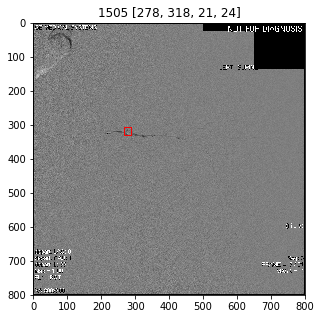

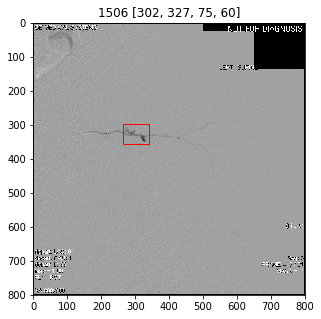

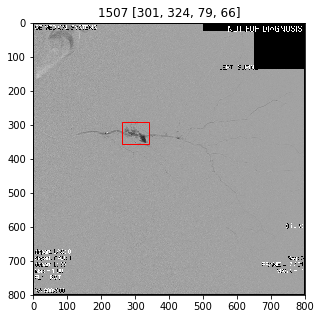

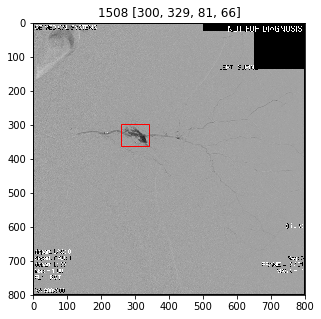

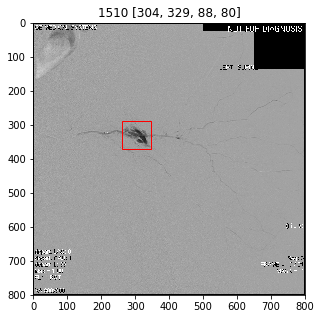

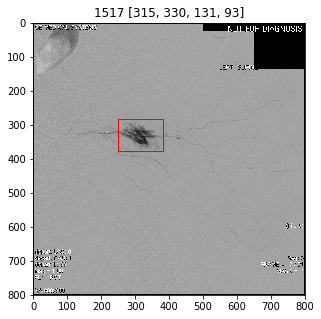

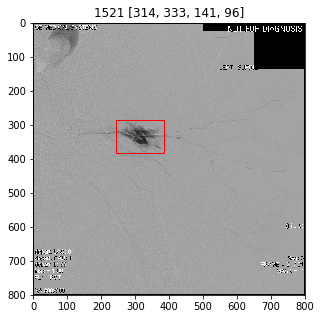

In [33]:
all_sorted_keys = sorted(imgdict.keys())

keys = [i for i in all_sorted_keys if str(i).startswith("15")]

for i in range(len(keys)):
    bb = boxdict[keys[i]]
    img = imgdict[keys[i]]
    imnbr = keys[i]
    
    fig1, ax1 = plt.subplots(figsize = (15,5))
    # ax1.set_ylim(ax1.get_ylim()[::-1])
    # Rectangle takes bottom-left coords
    
    ax1.add_patch(Rectangle(xy=(bb[0]-bb[2]/2.,bb[1]-bb[3]/2.), width=bb[2], height=bb[3],linewidth=1,edgecolor='r',facecolor='none'))
    ax1.set_title(str(imnbr)+" "+str(bb))
    ax1.imshow(img, cmap = "gray")

In [43]:
aug = iaa.AdditiveGaussianNoise(scale=(0.05*255))
imgs = list(imgdict.values())
imgs_noise = aug.augment_images(imgs)

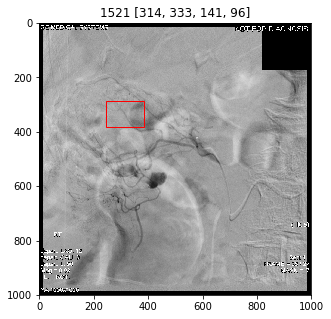

In [50]:
fig1, ax1 = plt.subplots(figsize = (15,5))
# ax1.set_ylim(ax1.get_ylim()[::-1])
# Rectangle takes bottom-left coords
ax1.add_patch(Rectangle(xy=(bb[0]-bb[2]/2.,bb[1]-bb[3]/2.), width=bb[2], height=bb[3],linewidth=1,edgecolor='r',facecolor='none'))
ax1.set_title(str(imnbr)+" "+str(bb))
ax1.imshow(imgs[9], cmap = "gray")

### Image Augmentation

- `_n` - only noise added

Flip Hz, Vl
- `_hf`
- `_vf`
- `_hfn`
- `_vfn`


Left, Right, Top, Bottom shifts. and them with noise added
- `_ls`
- `_ts`
- `_rs`
- `_bs`
- `_lsn`
- `_tsn`
- `_rsn`
- `_bsn`

List of Augmentations that can be done - 
- AdditiveGaussian
- Fliplr
- Flipud
- Affine
- 

In [ ]:
def aug_images(aug_idf, aug_seq, datapath):
    for file in os.listdir(datapath):
        if ".jpg" in file:
            if "_orig" in file:
                img = io.imread(datapath+file)
                aug_img = aug_seq.augment_image(img)
                io.imsave((datapath+file).replace("_orig",aug_idf), aug_img)
        if ".txt" in file:
            if "_orig" in file:
                with open(datapath+file,"r") as f: bbox = f.read()
                bbx = [int(float(i)*800) for i in bbox.split()[1:]]
                ## above are supposed to be mid-wh
                top_left = [bbx[0]-bbx[2]/2.,bbx[1]+bbx[3]/2.]
                bottom_right = [bbx[0]+bbx[2]/2.,bbx[1]-bbx[3]/2.]

                bbx_tlbr = ia.BoundingBoxesOnImage.from_xyxy_array(xyxy=np.array([top_left+bottom_right]),shape=img.shape)
                bb_aug = aug_seq.augment_bounding_boxes([bbx_tlbr])
                bb_aug = list(bb_aug[0].to_xyxy_array()[0])
                bb_aug_xymiwh = [(bb_aug[0]+bb_aug[2])/2., (bb_aug[1]+bb_aug[3])/2., bb_aug[2]-bb_aug[0], bb_aug[3] - bb_aug[1]] 
                bb_yolo = "0 "+" ".join([str(i/800.) for i in bb_aug_xymiwh])
                with open((datapath+file).replace("_orig",aug_idf),"w") as f: f.write(bb_yolo)

In [ ]:
gnoise = lambda : iaa.AdditiveGaussianNoise(scale=(0.05*255))
hflip = lambda : iaa.Fliplr(1)
vflip = lambda : iaa.Flipud(1)
shift = lambda x,y : iaa.Affine( translate_px={"x": x, "y": y})

aug_dict = {

# "_n" : iaa.Sequential([gnoise()]),

"_hf" : iaa.Sequential([hflip()]),
# "_hfn" : iaa.Sequential([hflip(), gnoise()]),

"_vf" : iaa.Sequential([vflip()]),
# "_vfn" : iaa.Sequential([vflip(), gnoise()]),

# "_ls" : iaa.Sequential([shift(x=-20, y=0)]),
# "_lsn" : iaa.Sequential([shift(x=-20, y=0), gnoise()]),

# "_rs" : iaa.Sequential([shift(x=20, y=0)]),
# "_rsn" : iaa.Sequential([shift(x=20, y=0), gnoise()]),

# "_ts" : iaa.Sequential([shift(x=0, y=20)]),
# "_tsn" : iaa.Sequential([shift(x=0, y=20), gnoise()]),

# "_bs" : iaa.Sequential([shift(x=0, y=-20)]),
# "_bsn" : iaa.Sequential([shift(x=0, y=-20), gnoise()]),

}

In [ ]:
for idf_i,seq_i in aug_dict.items():
    aug_images(idf_i, seq_i)